In [11]:
# Import declarations
import math
import re as re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
# Get the data
r = requests.get("https://www.hltv.org/stats/teams?startDate=2018-01-01&endDate=2020-12-31&matchType=Majors&rankingFilter=Top20")


# Create a pandas with pulled data
root = bs(r.content, "html.parser") 
root.prettify()
table = (str)(root.find("table"))
teams = pd.read_html(table, header=0)[0]

# Pull the country data out of the table and put into our dataframe
table = table.strip("\\n")
countries = (re.findall('title="(.+)"/>', table))
teams['Country'] = pd.Series(countries)

# Clean up columns
teams.columns = ['Team', 'Maps', 'K/D Differential', 'K/D', 'Rating', 'Country']
teams = teams[['Team', 'Country', 'Maps', 'K/D Differential', 'K/D', 'Rating']]

# Delete Tyloo from dataframe for reasons mentioned above
teams = teams.drop([0])

# Get a series with all team names
teamlist = teams[teams.columns[0]]

# Display resultant panda
teams

,Team,Country,Maps,K/D Differential,K/D,Rating
1,Natus Vincere,Ukraine,38,442,1.15,1.13
2,FaZe,Europe,31,178,1.07,1.05
3,Cloud9,United States,23,157,1.08,1.05
4,ENCE,Finland,22,-1,1.00,1.04
5,Renegades,Australia,24,18,1.01,1.03
6,MIBR,Brazil,24,-39,0.98,1.03
7,Vitality,France,18,-61,0.96,1.01
8,Liquid,United States,25,-38,0.98,1.01
9,fnatic,Sweden,14,-64,0.95,1.00
10,AVANGAR,Kazakhstan,20,-42,0.98,1.00


In [16]:
# Get the data
r = requests.get("https://www.hltv.org/stats/players?startDate=2018-01-01&endDate=2019-12-31&matchType=Majors&rankingFilter=Top20")


# Create a pandas with pulled data
root = bs(r.content, "html.parser")
root.prettify()

# Pull the player data out of the table and put into our dataframe
table = (str)(root.find("table"))
players = pd.read_html(table, header=0)[0]


players = players.sort_values('Teams')
players.columns = ['Player', 'Teams', 'Maps', 'Rounds', 'K/D Differential', 'K/D', 'Rating']

# Display resultant panda
del players['Teams']
players.index = np.arange(1, len(players) + 1)
players

,Player,Maps,Rounds,K/D Differential,K/D,Rating
1,s1mple,38,985,206,1.37,1.26
2,device,37,971,203,1.36,1.25
3,Magisk,33,877,130,1.25,1.22
4,electronic,38,985,147,1.24,1.22
5,flamie,38,985,139,1.22,1.19
6,coldzera,29,749,118,1.25,1.18
7,dupreeh,37,971,112,1.19,1.16
8,NiKo,31,840,88,1.16,1.16
9,olofmeister,31,840,86,1.16,1.15
10,Xyp9x,37,971,109,1.19,1.14


In [19]:
i = 0
masterDF = pd.DataFrame()

# # Top team URLS (for scraping match data)
# topTeamMatches = ['https://www.hltv.org/stats/teams/matches/6665/astralis?startDate=2018-01-01&endDate=2019-12-31&matchType=Majors&rankingFilter=Top20', \
#                   'https://www.hltv.org/stats/teams/matches/6667/faze?startDate=2018-01-01&endDate=2019-12-31&matchType=Majors&rankingFilter=Top20', \
#                   'https://www.hltv.org/stats/teams/matches/4608/natus-vincere?startDate=2018-01-01&endDate=2019-12-31&matchType=Majors&rankingFilter=Top20', \
#                   'https://www.hltv.org/stats/teams/matches/6673/nrg?startDate=2018-01-01&endDate=2019-12-31&matchType=Majors&rankingFilter=Top20', \
#                   'https://www.hltv.org/stats/teams/matches/5973/liquid?startDate=2018-01-01&endDate=2019-12-31&matchType=Majors&rankingFilter=Top20', \
#                   'https://www.hltv.org/stats/teams/matches/6211/renegades?startDate=2018-01-01&endDate=2019-12-31&matchType=Majors&rankingFilter=Top20', \
#                   'https://www.hltv.org/stats/teams/matches/9565/vitality?startDate=2018-01-01&endDate=2019-12-31&matchType=Majors&rankingFilter=Top20']

# topTeamMatches
# Go through each of the top 10 teams match data, sanitize/clean it, and throw the match data into one unified master dataframe
#for team in topTeamMatches :
    
    # Pull/scrape/parse data
    # r = requests.get(team)
    # root = bs(r.content, "html.parser") 
    # root.prettify()
    # table = (str)(root.find("table"))
    # astralis = pd.read_html(table, header=0)[0]
    
#     # Give columns proper names
#     astralis.columns = ['Date', 'Event', 'Opponent', 'Map', 'Rating', 'W/L', 'Outcome']
    
#     # Clean win/loss data and turn to numeric format for compatibilty with machine learning classifier
#     astralis.loc[astralis.Outcome == 'W', 'Outcome'] = 1
#     astralis.loc[astralis.Outcome == 'L', 'Outcome'] = 0
#     astralis.loc[astralis.Outcome == 'T', 'Outcome'] = 0
    
#     # Misc sanitation (datetime conversion, typecasting)
#     astralis['Outcome'] = astralis['Outcome'].astype(str).astype(int)
#     astralis['Event'] = astralis['Event'].astype(str)
#     astralis['Date'] = pd.to_datetime(astralis['Date'])
#     astralis['Year'] = astralis['Date'].dt.year
#     masterDF = masterDF.append(astralis)
#     i += 1
    
# # Reset indexes so that they are from 0 to N instead of being random jumbled numbers
# masterDF = masterDF.reset_index(drop=True)

# # Drop unneeded colums and clean up names of other columns
# masterDF = masterDF.drop(['Event', 'Opponent'], axis=1)
# masterDF = masterDF.rename(index=str, columns={"Map" : "Opponent", "Rating" : "Map"})
# cols = masterDF.columns.tolist()
# cols = cols[-1:] + cols[:-1]
# masterDF = masterDF[cols]

# Print resultant dataframe of all merged together top 10 team historic match results
masterDF = pd.read_csv('C:/Users/hp/Downloads/csgo_major.csv')
del masterDF['Event']

masterDF


,Team,Date,Opponent,Map,W/L,Outcome,Year
0,Astralis,12/09/18,Natus Vincere,Inferno,16 - 14,1,2018
1,Astralis,21/01/18,fnatic,Mirage,8 - 16,0,2018
2,Astralis,14/09/18,Liquid,Inferno,15 - 19,0,2018
3,Astralis,22/01/18,Cloud9,Train,6 - 16,0,2018
4,Astralis,15/09/18,MIBR,Dust2,16 - 0,1,2018
...,...,...,...,...,...,...,...
140,NIP,24/02/19,Vitality,Mirage,16 - 7,1,2019
141,NIP,01/03/19,Astralis,Dust2,14 - 16,0,2019
142,NIP,20/02/19,NRG,Nuke,16 - 14,1,2019
143,NIP,28/08/19,MIBR,Dust2,12 - 16,0,2019


Average kill/death ratio of teams given:  1.0009259259259258


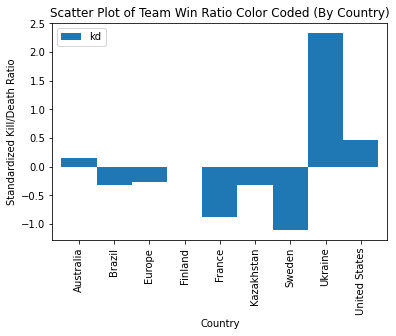

In [20]:
g = teams.groupby("Country")
kd = g.mean()['K/D']
avg = kd.mean()
std = kd.std()
normalized_kd = []
for c in kd:
    normalized_kd.append((c-avg)/std)
    
ts = teams['Country'].sort_values().unique()
temp = pd.DataFrame({'teams': ts, 'kd': normalized_kd})

print("Average kill/death ratio of teams given: ", avg)

# Create scatter plot of team win ratio (by country)
ax = temp.plot(kind='bar',x='teams',y='kd', title='Scatter Plot of Team Win Ratio Color Coded (By Country)', width = 1)
ax.set_xlabel('Country')
ax.set_ylabel('Standardized Kill/Death Ratio')
plt.show()

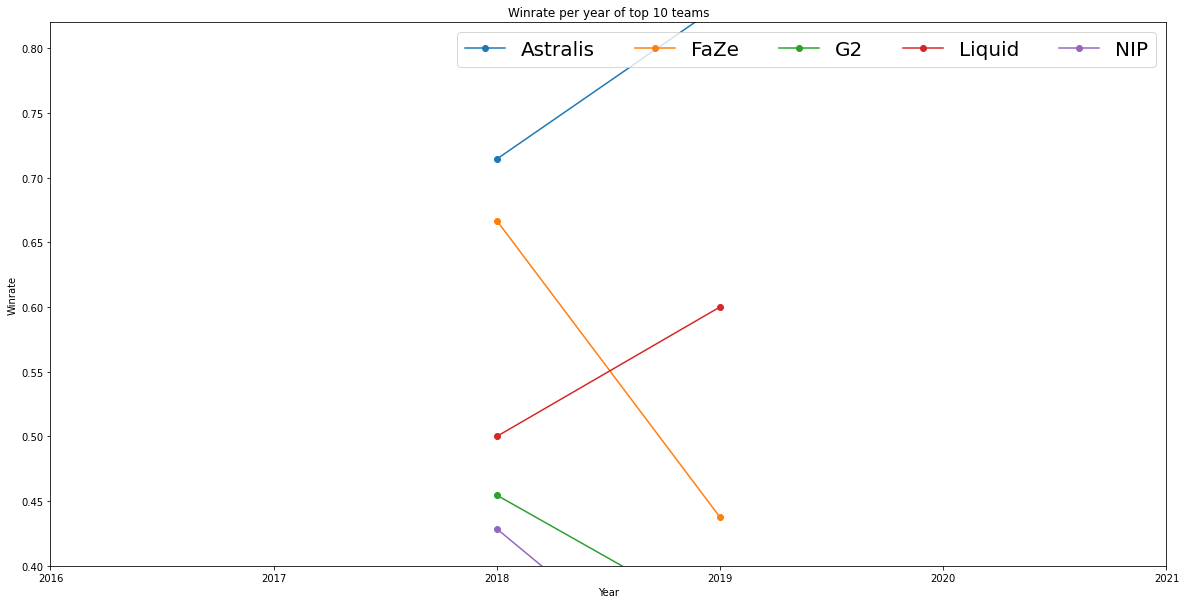

Astralis win rate in 2018: 0.7142857142857143
Astralis win rate in 2019: 0.8333333333333334


In [26]:
chanz = masterDF.groupby(['Team','Year'])['Outcome'].mean()
cha = chanz.to_frame()
cha['o'] = chanz.index.get_level_values('Team')
cha['f'] = chanz.index.get_level_values('Year')

cha = cha.reset_index(drop=True)
cha = cha.rename(columns={'Outcome': 'Outcome', 'o': 'Team', 'f': 'Year'})

# Group by team and get unique
ts = cha.groupby('Team')
names = ts['Team'].unique()
flat_names = [item for sublist in names for item in sublist]

# Format plot
plt.figure(figsize=(20,10))
plt.xlim(2016,2021)
plt.ylim(.4, .82)
plt.title("Winrate per year of top 5 teams at CSGO Major Tournaments")
plt.ylabel('Winrate')
plt.xlabel('Year')

# Plot for each team
for k,v in ts:
    plt.plot(v['Year'], v['Outcome'],marker='o')
    
plt.legend(flat_names, ncol=5, prop={'size': 20})

# Show aformentioned plot
plt.show()

# Print out significant data about NiP
wrs = ts.get_group('Astralis')['Outcome'].tolist()
years = ['2018', '2019']

for i in range(0,2):
    print("Astralis win rate in " + years[i] + ":", wrs[i])

C:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Linear SVM 10 Point Cross Validation On Europe Data
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 1.   1.  ]


Linear SVM 10 Point Cross Validation On America Data
[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.33333333
 0.33333333 0.5        0.5        0.5       ]


Linear SVM Cross Mean and Standard Error For Europe Data
Accuracy: 0.80 (+/- 0.20)


Linear SVM Cross Mean and Standard Error For America Data
Accuracy: 0.55 (+/- 0.26)




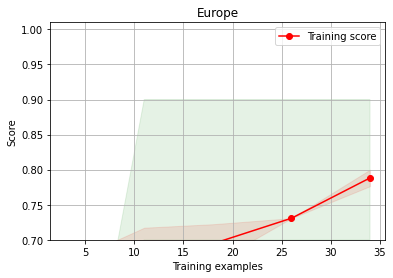

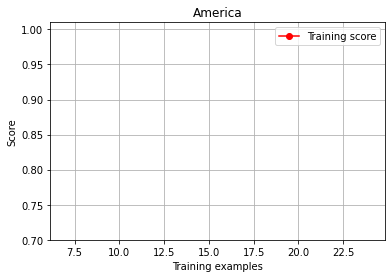

In [35]:
# Convert datetime data to ordinal format so it can be used in our machine learning classisfier
from datetime import datetime
masterDF['Date']= pd.to_datetime(masterDF['Date'])
masterDF['Date'] = masterDF['Date'].apply(lambda x: x.toordinal())

# A function that plots a learning curve of a given machine learning classifier (provided by SKLearn documentation)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")

    plt.legend(loc="best")
    return plt

# Lump groups of countries together for machine learning purposes
europe = masterDF[(masterDF.Team == 'Astralis')]
america = masterDF[(masterDF.Team == 'Liquid')]
cis = masterDF[(masterDF.Team == 'Natus Vincere')]

# Create SKlearn machine learning classifier
eursvc = svm.SVC()
amersvc = svm.SVC()
cis = svm.SVC()

# Give the machine learning classifiers the training data
eursvc.fit(europe.Date.values.reshape((len(europe),1)), europe.Outcome)
amersvc.fit(america.Date.values.reshape((len(america),1)), america.Outcome)
#cissvc.fit(cis.Date.values.reshape((len(cis),1)), cis.Outcome)

# Perform a cross validation analysis on each of the three country group classifiers
europesvm = cross_val_score(eursvc, europe.Date.values.reshape((len(europe),1)), europe.Outcome, cv=10)
americasvm = cross_val_score(amersvc, america.Date.values.reshape((len(america),1)), america.Outcome, cv=10)
#cissvm = cross_val_score(cissvc, cis.Date.values.reshape((len(cis),1)), cis.Outcome, cv=10)

# Perform a 10 point cross validation on Europe group
print ("Linear SVM 10 Point Cross Validation On Europe Data")
print(europesvm)
print ("\n")

# Perform a 10 point cross validation on America group
print ("Linear SVM 10 Point Cross Validation On America Data")
print(americasvm)
print ("\n")

# # Perform a 10 point cross validation on CIS group
# print ("Linear SVM 10 Point Cross Validation On CIS Data")
# print(cissvm)
# print("\n")

# Cross mean and standard error stats for each country under SVM classifier
print ("Linear SVM Cross Mean and Standard Error For Europe Data")
print("Accuracy: %0.2f (+/- %0.2f)" % (europesvm.mean(), europesvm.std() * 2))
print("\n")

print ("Linear SVM Cross Mean and Standard Error For America Data")
print("Accuracy: %0.2f (+/- %0.2f)" % (americasvm.mean(), americasvm.std() * 2))
print("\n")

# print ("Linear SVM Cross Mean and Standard Error For CIS Data")
# print("Accuracy: %0.2f (+/- %0.2f)" % (cissvm.mean(), cissvm.std() * 2))

# Plot the learning curves for each of the three country groups
plot_learning_curve(eursvc, "Europe", europe.Date.values.reshape((len(europe),1)), europe.Outcome, ylim=(0.7, 1.01), cv=10, n_jobs=4)
plot_learning_curve(amersvc, "America", america.Date.values.reshape((len(america),1)), america.Outcome, ylim=(0.7, 1.01), cv=10, n_jobs=4)
# plot_learning_curve(cissvc, "cis", cis.Date.values.reshape((len(cis),1)), cis.Outcome, ylim=(0.7, 1.01), cv=10, n_jobs=4)

# Show the learning curves
plt.show()


Predicted Outcome of Next 100 Games By Astralis


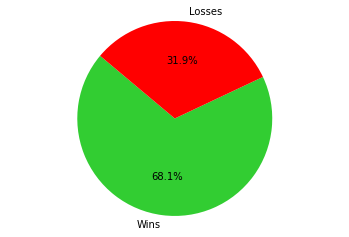


Predicted Outcome of Next 100 Games By Liquid


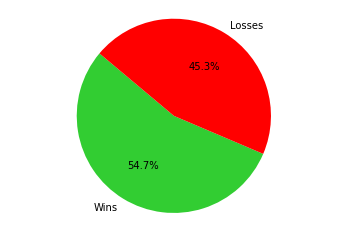

In [48]:
# Initialize win count variables for each predicition
astraliswincount = 0
liquidwincount = 0


# Calculate the each country group amount of wins for the next 250 games
for x in range(735621, 735871):
    if eursvc.predict([[x]]) == [1] :
        astraliswincount += 1

for x in range(735621, 735871):
    if amersvc.predict([[x]]) == [1] :
        liquidwincount += 1

        
# Output Europe group predicition results
print("Predicted Outcome of Next 100 Games By Astralis")
plt.pie([astraliswincount, 367-astraliswincount], explode=(0, 0), labels=['Wins', 'Losses'], colors=['limegreen', 'red'],
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()

# Output America group predicition results
print("\nPredicted Outcome of Next 100 Games By Liquid")
plt.pie([liquidwincount, 457-liquidwincount], explode=(0, 0), labels=['Wins', 'Losses'], colors=['limegreen', 'red'],
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()

